In [ ]:
!pip install matplotlib

In [1]:
from common.fashion_mnist_data_loader import FashionMNISTDataLoader
train_loader, test_loader = FashionMNISTDataLoader.get_dataloaders(
    batch_size=32, test_batch_size=1000)

num_clients = 5
num_rounds = 10
local_epochs = 3
epochs = 10

### Centralized Model

In [2]:
from common.simple_cnn import SimpleCNN
from trainers.centralised.centralised_trainer import CentralizedTrainer, CentralizedConfig

centralized_config = CentralizedConfig(epochs=epochs)
trainer = CentralizedTrainer(SimpleCNN(), train_loader, test_loader, centralized_config)
global_model_centralized = trainer.train()

Epoch 1/10 | Train Acc: 68.96% | Train Loss: 0.8795 | Test Acc: 77.92% | Test Loss: 0.6173
Epoch 2/10 | Train Acc: 79.72% | Train Loss: 0.5508 | Test Acc: 79.76% | Test Loss: 0.5440
Epoch 3/10 | Train Acc: 82.57% | Train Loss: 0.4755 | Test Acc: 83.89% | Test Loss: 0.4545
Epoch 4/10 | Train Acc: 84.62% | Train Loss: 0.4287 | Test Acc: 84.24% | Test Loss: 0.4385
Epoch 5/10 | Train Acc: 85.42% | Train Loss: 0.4024 | Test Acc: 84.62% | Test Loss: 0.4254
Epoch 6/10 | Train Acc: 86.27% | Train Loss: 0.3822 | Test Acc: 85.79% | Test Loss: 0.3946
Epoch 7/10 | Train Acc: 86.88% | Train Loss: 0.3655 | Test Acc: 84.41% | Test Loss: 0.4235
Epoch 8/10 | Train Acc: 87.27% | Train Loss: 0.3546 | Test Acc: 85.67% | Test Loss: 0.4001
Epoch 9/10 | Train Acc: 87.67% | Train Loss: 0.3426 | Test Acc: 85.95% | Test Loss: 0.3883
Epoch 10/10 | Train Acc: 87.97% | Train Loss: 0.3328 | Test Acc: 87.27% | Test Loss: 0.3488


### FedAvg bez Homomorphic Encryption

In [3]:
from trainers.federated_he.federated_trainer import FederatedConfig, FederatedTrainer

federated_config_no_he = FederatedConfig(num_clients=num_clients, num_rounds=num_rounds, local_epochs=local_epochs)
federated_trainer = FederatedTrainer(train_loader, test_loader, federated_config_no_he)
global_model_no_he = federated_trainer.train()


##### Running FL | num_clients=5, num_rounds=10, local_epochs=3, HE=False #####

======== Round 1 ========
Client 1 | Train Acc: 80.14% | Train Loss: 0.5264
Client 2 | Train Acc: 79.78% | Train Loss: 0.5225
Client 3 | Train Acc: 80.48% | Train Loss: 0.5204
Client 4 | Train Acc: 80.09% | Train Loss: 0.5276
Client 5 | Train Acc: 81.67% | Train Loss: 0.5057
Global Model | Test Acc: 78.79% | Test Loss: 0.57

======== Round 2 ========
Client 1 | Train Acc: 86.22% | Train Loss: 0.3812
Client 2 | Train Acc: 85.43% | Train Loss: 0.4041
Client 3 | Train Acc: 85.77% | Train Loss: 0.4049
Client 4 | Train Acc: 84.49% | Train Loss: 0.4251
Client 5 | Train Acc: 86.12% | Train Loss: 0.3863
Global Model | Test Acc: 84.44% | Test Loss: 0.44

======== Round 3 ========
Client 1 | Train Acc: 87.74% | Train Loss: 0.3355
Client 2 | Train Acc: 86.67% | Train Loss: 0.3650
Client 3 | Train Acc: 87.50% | Train Loss: 0.3567
Client 4 | Train Acc: 85.88% | Train Loss: 0.3874
Client 5 | Train Acc: 87.09% | Train L

### FedAvg z Homomorphic Encryption (HE)

In [4]:
from trainers.federated_he.client_trainer import HEConfig
from trainers.federated_he.federated_trainer import FederatedConfig, FederatedTrainer

global_models_dp = []

he_configs = [
    HEConfig(scale=2**27),
    HEConfig(scale=2**28),
    HEConfig(scale=2**30),
    HEConfig(scale=2**35),
    HEConfig(scale=2**40),
    HEConfig(scale=2**45)
]

global_models_he = []

for he_config in he_configs:
    federated_config_he = FederatedConfig(num_clients=num_clients, num_rounds=num_rounds, local_epochs=local_epochs, he_config=he_config)
    federated_trainer = FederatedTrainer(train_loader, test_loader, federated_config_he)
    global_models_he.append(federated_trainer.train())


##### Running FL | num_clients=5, num_rounds=10, local_epochs=3, HE=True, poly_modulus_degree=32768, coeff_mod_bit_sizes=[60, 40, 40, 60], scale=134217728 #####

======== Round 1 ========
Client 1 | Train Acc: 79.40% | Train Loss: 0.5581
Client 2 | Train Acc: 78.46% | Train Loss: 0.5898
Client 3 | Train Acc: 79.88% | Train Loss: 0.5577
Client 4 | Train Acc: 77.16% | Train Loss: 0.5880
Client 5 | Train Acc: 78.89% | Train Loss: 0.5583
Global Model | Test Acc: 17.34% | Test Loss: 5.28

======== Round 2 ========
Client 1 | Train Acc: 83.04% | Train Loss: 0.4599
Client 2 | Train Acc: 82.31% | Train Loss: 0.4766
Client 3 | Train Acc: 82.69% | Train Loss: 0.4701
Client 4 | Train Acc: 80.72% | Train Loss: 0.5155
Client 5 | Train Acc: 81.52% | Train Loss: 0.4941
Global Model | Test Acc: 7.85% | Test Loss: 10.14

======== Round 3 ========
Client 1 | Train Acc: 83.98% | Train Loss: 0.4370
Client 2 | Train Acc: 83.89% | Train Loss: 0.4421
Client 3 | Train Acc: 84.12% | Train Loss: 0.4408
Client 

### Wizualizacja wyników

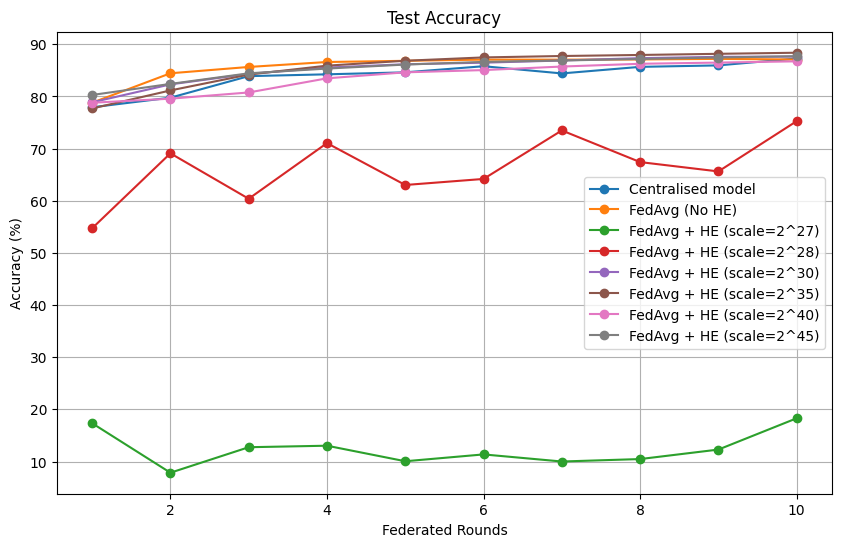

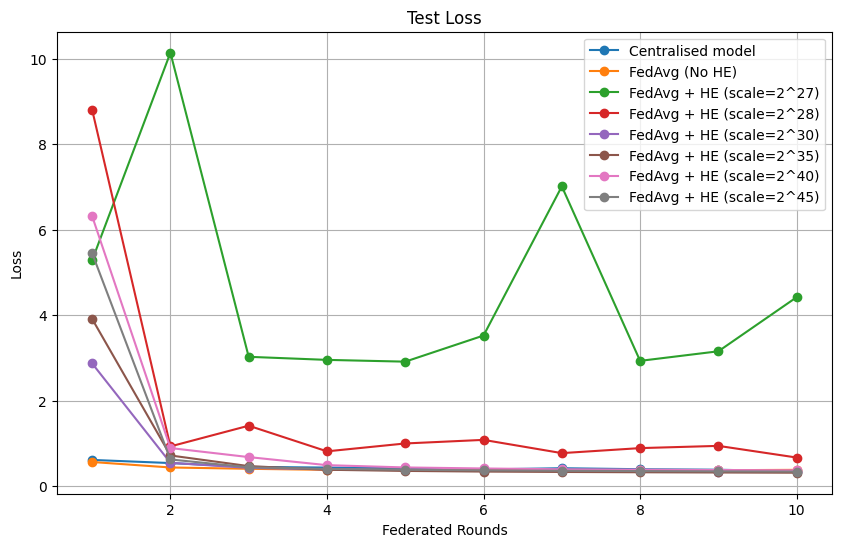

In [13]:
import math
import matplotlib.pyplot as plt

def get_training_logs(model_wrapper):
    return model_wrapper.train_acc, model_wrapper.train_loss, model_wrapper.test_acc, model_wrapper.test_loss, model_wrapper.exec_time

def plot_results(metric_name, models, labels, ylabel, metric_type):
    plt.figure(figsize=(10, 6))

    for model, label in zip(models, labels):
        _, _, test_acc, test_loss, _ = get_training_logs(model)

        x_axis = list(range(1, len(test_acc) + 1))

        if metric_type == "accuracy":
            plt.plot(x_axis, test_acc, label=label, marker="o")
        elif metric_type == "loss":
            plt.plot(x_axis, test_loss, label=label, marker="o")

    plt.xlabel("Federated Rounds")
    plt.ylabel(ylabel)
    plt.title(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

models = [global_model_centralized, global_model_no_he] + global_models_he

labels = ["Centralised model", "FedAvg (No HE)"] + [f"FedAvg + HE (scale=2^{int(math.log2(cfg.scale))})" for cfg in he_configs]
plot_results("Test Accuracy", models, labels, "Accuracy (%)", "accuracy")
plot_results("Test Loss", models, labels, "Loss", "loss")

[0, 277.3260381221771, 289.4227488040924, 281.12887811660767, 283.42220282554626, 283.69169211387634, 288.91420698165894, 289.8069407939911]
['Centralised model', 'FedAvg (No HE)', 'FedAvg + HE (scale=2^27)', 'FedAvg + HE (scale=2^28)', 'FedAvg + HE (scale=2^30)', 'FedAvg + HE (scale=2^35)', 'FedAvg + HE (scale=2^40)', 'FedAvg + HE (scale=2^45)']


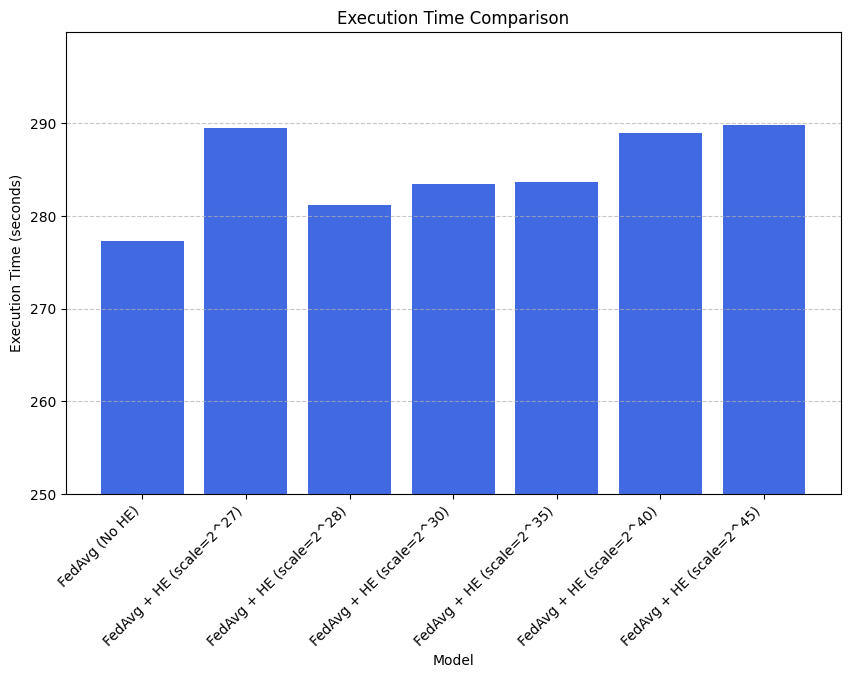

In [12]:
exec_times = [get_training_logs(model)[-1] for model in models]
print(exec_times)
print(labels)
plt.figure(figsize=(10, 6))
plt.bar(labels[1:], exec_times[1:], color="royalblue")

plt.xlabel("Model")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(250, max(exec_times) + 10)

plt.show()